In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# 1. Data Exploration and Preprocessing

In [6]:
df=pd.read_csv('blogs.csv')

In [14]:
df.head(8)

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
5,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,alt.atheism
6,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
7,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [16]:
# data preprocessing

In [18]:
#Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ravi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ravi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# lets define function for preprocessing 
def preprocess_text(text):
    text = text.lower() # to convrt text to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = word_tokenize(text)  # Tokenize text
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]  # Remove stopwords
    # join words back into single string
    return ' '.join(text)


In [26]:
# Apply preprocessing to the 'Data' colum

df['Processed_Data'] = df['Data'].apply(preprocess_text)

In [38]:
# display sample data after preprocessing

df[['Data','Processed_Data']].head()

,Data,Processed_Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,xref cantaloupesrvcscmuedu altatheism talkreli...


## Feature extraction using TF-IDF

In [44]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features based on dataset size and model requirements.

In [52]:
# Transform the 'Processed_Data' column into TF-IDF features

features = tfidf_vectorizer.fit_transform(df['Processed_Data'])
target=df['Labels']

In [71]:
# Display shape of TF-IDF matrix and first few feature names
print("TF-IDF Matrix Shape:", features.shape)
print("Sample feature names:", tfidf_vectorizer.get_feature_names_out()[:10])

TF-IDF Matrix Shape: (2000, 5000)
Sample feature names: ['aa' 'aafreenetcarletonca' 'aaron' 'ab' 'abc' 'ability' 'able' 'abortion'
 'abs' 'absolute']


# 2. Naive Bayes Model for Text Classification

In [56]:
# split into training and testing 
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.80, random_state=50)

In [60]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1600, 5000)
(1600,)
(400, 5000)
(400,)


In [62]:
# Train Naive Bayes model
nb_model = MultinomialNB()

In [64]:
nb_model.fit(x_train, y_train)

MultinomialNB()

In [68]:
y_pred=nb_model.predict(x_test)
y_pred

array(['comp.windows.x', 'sci.electronics', 'soc.religion.christian',
       'rec.sport.baseball', 'talk.religion.misc', 'sci.crypt',
       'comp.sys.mac.hardware', 'comp.graphics', 'rec.sport.hockey',
       'misc.forsale', 'sci.space', 'sci.med', 'comp.graphics',
       'comp.os.ms-windows.misc', 'talk.religion.misc',
       'rec.sport.baseball', 'comp.sys.ibm.pc.hardware', 'alt.atheism',
       'rec.motorcycles', 'comp.graphics', 'soc.religion.christian',
       'talk.politics.misc', 'sci.space', 'alt.atheism',
       'rec.motorcycles', 'sci.space', 'comp.sys.mac.hardware',
       'comp.os.ms-windows.misc', 'talk.politics.misc',
       'rec.sport.baseball', 'misc.forsale', 'talk.politics.guns',
       'rec.motorcycles', 'sci.med', 'sci.med', 'sci.crypt',
       'misc.forsale', 'sci.crypt', 'talk.religion.misc',
       'talk.politics.misc', 'comp.graphics', 'comp.sys.ibm.pc.hardware',
       'sci.crypt', 'talk.politics.misc', 'talk.religion.misc',
       'comp.os.ms-windows.misc', '

# 3. Sentiment Anlaysis

In [74]:
# For sentiment analysis, we can use the SentimentIntensityAnalyzer from the nltk library

In [88]:
# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [80]:
# Define function to get sentiments label

def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'


In [82]:
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [86]:
# Display the first five rows to verify
df[['Data', 'Sentiment']].head()

,Data,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,negative
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,positive
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,negative
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,positive


In [96]:
# calculate sentiment distribution across categories
sentiment_summary = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)

In [114]:
# Print sentiment summary for each category
# Reflect on Sentiment Analysis results
print("\nSentiment Analysis Summary:")
print(sentiment_summary)


Sentiment Analysis Summary:
Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                   42.0      1.0      57.0
comp.graphics                 13.0      4.0      83.0
comp.os.ms-windows.misc       24.0      2.0      74.0
comp.sys.ibm.pc.hardware      21.0      0.0      79.0
comp.sys.mac.hardware         24.0      3.0      73.0
comp.windows.x                20.0      2.0      78.0
misc.forsale                   7.0      8.0      85.0
rec.autos                     27.0      1.0      72.0
rec.motorcycles               30.0      2.0      68.0
rec.sport.baseball            27.0      1.0      72.0
rec.sport.hockey              28.0      1.0      71.0
sci.crypt                     29.0      0.0      71.0
sci.electronics               18.0      4.0      78.0
sci.med                       38.0      1.0      61.0
sci.space                     32.0      3.0      65.0
soc.religion.christian        29.0      0.0      71.0

In [102]:
# Optionally, we weill plot distribution for better visualisation

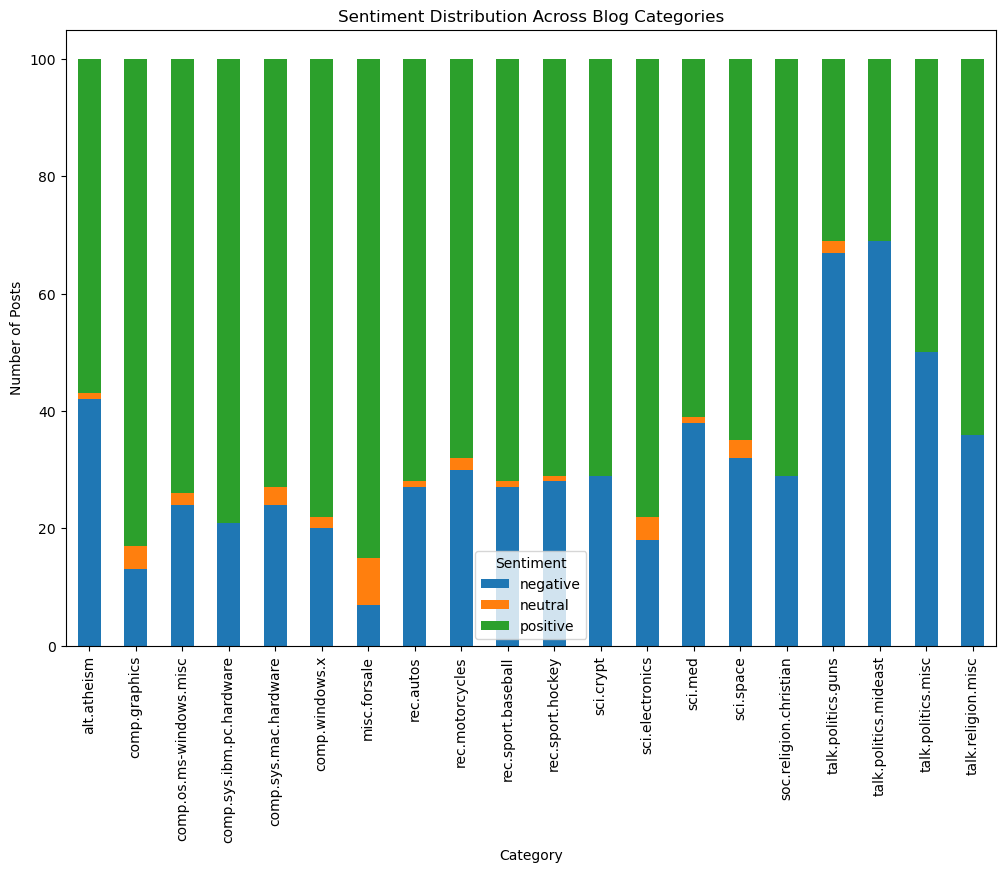

In [100]:
# Plot sentiment distribution
sentiment_summary.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Sentiment Distribution Across Blog Categories")
plt.xlabel("Category")
plt.ylabel("Number of Posts")
plt.legend(title="Sentiment")
plt.show()

# 4. Evaluation

In [110]:
# Now, we’ll evaluate the model’s performance using accuracy, precision, recall, and F1-score.

In [105]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [107]:
print("Naive Bayes Model Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Naive Bayes Model Performance:
Accuracy: 0.8675
Precision: 0.8766207934523336
Recall: 0.8675
F1 Score: 0.8680968400820441


# ------ The End ------